In [1]:
import numpy as np
import pandas as pd
import sklearn_evaluation
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC, SVC


In [12]:
X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
y_train = y_train.ravel()

scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_robust = RobustScaler().fit(X_train)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

pca = PCA(n_components=56, random_state=42)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)


In [ ]:
np.random.seed(42)


def grid_search_random_forest(n_estimators, max_features, X_train_data, max_depth=None, max_leaf_nodes=None):
    parameters = {
        'n_estimators': n_estimators,
        'max_features': max_features,
    }
    include_additional_parameters(max_depth, max_leaf_nodes, parameters)

    classifier = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True,
    )

    grid_search.fit(X_train_data, y_train)
    print_grid_search_results(grid_search, parameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))


def include_additional_parameters(max_depth, max_leaf_nodes, parameters):
    if max_depth is not None:
        parameters.update({'max_depth': max_depth})
    if max_leaf_nodes is not None:
        parameters.update({'max_leaf_nodes': max_leaf_nodes})


def graph_grid_search_random_forest(grid_search):
    print(grid_search.cv_results_)
    plt.figure(figsize=[8,8])
    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=("n_estimators", "max_features")
    )

    plt.title("Random Forest")
    plt.xlabel("n_estimators")
    plt.ylabel("max_features")
    plt.legend()
    plt.show()


def plot_3d_heatmap(grid_results):
    result_params = grid_results.cv_results_['params']
    df = pd.DataFrame(result_params)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = df.loc[:, 'n_estimators']
    y = df.loc[:, 'max_features']
    z = df.loc[:, 'max_depth']
    c = grid_results.cv_results_['mean_test_score']
    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    fig.colorbar(img)
    plt.show()

In [6]:
np.random.seed(42)

n_estimators = np.linspace(20, 40, 3, dtype=int)
max_features = np.linspace(1, 12, 6, dtype=int)

grid_search = grid_search_random_forest(n_estimators, max_features, X_train)

Best n_estimators: 40
Best max_features: 5
Accuracy:  0.8761261261261262


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'mean_fit_time': array([0.03691816, 0.08627772, 0.07388002, 0.04197598, 0.06216496,
       0.07743549, 0.04885006, 0.0650335 , 0.08770341, 0.04898036,
       0.0763188 , 0.10223317, 0.05651122, 0.08592951, 0.10936999,
       0.06166434, 0.09030008, 0.12527972]), 'std_fit_time': array([0.00240248, 0.0321369 , 0.00286486, 0.00122317, 0.00535539,
       0.00196331, 0.00199098, 0.00169191, 0.00080884, 0.00244517,
       0.00355624, 0.00156519, 0.00144965, 0.00322887, 0.00636734,
       0.00087093, 0.00106074, 0.0041477 ]), 'mean_score_time': array([0.00350052, 0.00671315, 0.0066371 , 0.00355065, 0.00582874,
       0.00668812, 0.00437117, 0.00480628, 0.0058257 , 0.00348973,
       0.00564528, 0.00656825, 0.00374454, 0.00474674, 0.00552464,
       0.00373894, 0.00417268, 0.006275  ]), 'std_score_time': array([0.0001353 , 0.00209009, 0.00055193, 0.00030727, 0.00084487,
       0.00032394, 0.00133272, 0.00027661, 0.00057619, 0.00036966,
       0.00093972, 0.00074189, 0.0009152 , 0.0007558 , 0.

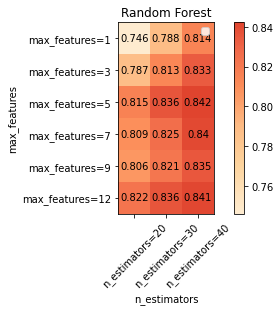

In [7]:

graph_grid_search_random_forest(grid_search)

In [8]:
np.random.seed(42)

n_estimators = np.linspace(30, 100, 3, dtype=int)
max_features = np.linspace(3, 16, 6, dtype=int)

grid_search_t2 = grid_search_random_forest(n_estimators, max_features, X_train)

Best n_estimators: 100
Best max_features: 3
Accuracy:  0.8581081081081081


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'mean_fit_time': array([0.06055748, 0.14654946, 0.18804193, 0.0628078 , 0.13828421,
       0.20972067, 0.08067131, 0.16210324, 0.24966496, 0.08707929,
       0.18384796, 0.27751732, 0.09280497, 0.21048427, 0.32091427,
       0.10647017, 0.23119074, 0.36182684]), 'std_fit_time': array([0.00317391, 0.03162527, 0.00699937, 0.00127062, 0.00428157,
       0.00151314, 0.00230547, 0.0009734 , 0.00469132, 0.00408342,
       0.00362789, 0.00219144, 0.00081921, 0.00390728, 0.00482571,
       0.00232869, 0.00279473, 0.00377933]), 'mean_score_time': array([0.00495529, 0.01113856, 0.01305455, 0.00493979, 0.0093326 ,
       0.01385677, 0.00466543, 0.0098145 , 0.01374769, 0.00433725,
       0.00935847, 0.01435274, 0.00488156, 0.00835854, 0.01253247,
       0.00434679, 0.00834852, 0.01293433]), 'std_score_time': array([0.00042789, 0.00201633, 0.00018292, 0.00050118, 0.00074098,
       0.00061587, 0.00085877, 0.00122533, 0.0010847 , 0.00033784,
       0.00082918, 0.00121137, 0.00047561, 0.00019134, 0.

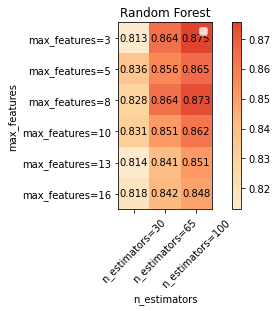

In [9]:

graph_grid_search_random_forest(grid_search_t2)


In [10]:
np.random.seed(42)

n_estimators = np.linspace(100, 600, 6, dtype=int)
max_features = np.linspace(1, 10, 10, dtype=int)

grid_search_t3 = grid_search_random_forest(n_estimators, max_features, X_train)

Best n_estimators: 500
Best max_features: 5
Accuracy:  0.8918918918918919


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'mean_fit_time': array([0.19541281, 0.34704912, 0.51268709, 0.76099986, 0.92693728,
       1.00647676, 0.18754828, 0.38010979, 0.7116431 , 0.91138792,
       1.01773214, 1.21546614, 0.21837491, 0.4277792 , 0.6241262 ,
       0.83479655, 1.02871519, 1.2344414 , 0.22353137, 0.44594651,
       0.67288232, 0.900096  , 1.11692202, 1.34805197, 0.24077833,
       0.46217877, 0.7071687 , 0.915766  , 1.18091309, 1.41573322,
       0.25979078, 0.52299958, 0.7549808 , 1.01396877, 1.32168972,
       1.54410827, 0.27591521, 0.54587322, 0.83742213, 1.11897123,
       1.38302302, 1.64673185, 0.29241014, 0.58453351, 0.86675876,
       1.15597045, 1.44294536, 1.74689221, 0.30807871, 0.61319649,
       0.91609246, 1.21601152, 1.52747577, 1.86807573, 0.34579575,
       0.64378572, 0.95990473, 1.34092599, 1.60565102, 2.010427  ]), 'std_fit_time': array([0.02643102, 0.00434695, 0.01932245, 0.078973  , 0.03503546,
       0.03245722, 0.00320505, 0.00976533, 0.25015524, 0.11746726,
       0.01876355, 0.03625

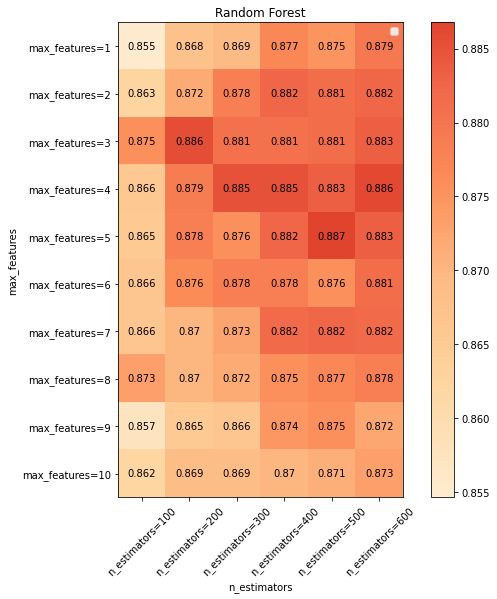

In [17]:

graph_grid_search_random_forest(grid_search_t3)

In [18]:
rf = RandomForestClassifier(max_features=5, n_estimators=500).fit(X_train, y_train)
y_predictions = rf.predict(X_test)
print("Train: ", rf.score(X_train, y_train))
print("Test: ", rf.score(X_test, y_test))

Train:  0.9915492957746479
Test:  0.8918918918918919


standard

In [5]:

np.random.seed(42)

n_estimators = np.linspace(100, 600, 6, dtype=int)
max_features = np.linspace(1, 10, 10, dtype=int)

grid_search_standard = grid_search_random_forest(n_estimators, max_features, X_train_standard)


Best n_estimators: 500
Best max_features: 5
Accuracy:  0.3783783783783784


In [6]:
rf_standard = RandomForestClassifier(
    n_estimators=grid_search_standard.best_params_['n_estimators'],
    max_features=grid_search_standard.best_params_['max_features'],
).fit(X_train_standard, y_train)
print(rf_standard.score(X_train_standard, y_train))
print(rf_standard.score(X_test_standard, y_test))

0.9915492957746479
0.8918918918918919


robust

In [7]:

np.random.seed(42)

n_estimators = np.linspace(100, 600, 6, dtype=int)
max_features = np.linspace(1, 10, 10, dtype=int)

grid_search_robust = grid_search_random_forest(n_estimators, max_features, X_train_robust)

Best n_estimators: 500
Best max_features: 5
Accuracy:  0.6148648648648649


In [8]:


rf_robust = RandomForestClassifier(
    n_estimators=grid_search_robust.best_params_['n_estimators'],
    max_features=grid_search_robust.best_params_['max_features'],
).fit(X_train_robust, y_train)
print(rf_robust.score(X_train_robust, y_train))
print(rf_robust.score(X_test_robust, y_test))

0.9915492957746479
0.8918918918918919


minmax

In [9]:

np.random.seed(42)

n_estimators = np.linspace(100, 600, 6, dtype=int)
max_features = np.linspace(1, 10, 10, dtype=int)

grid_search_minmax = grid_search_random_forest(n_estimators, max_features, X_train_minmax)


Best n_estimators: 500
Best max_features: 5
Accuracy:  0.5968468468468469


In [10]:

rf_minmax = RandomForestClassifier(
    n_estimators=grid_search_minmax.best_params_['n_estimators'],
    max_features=grid_search_minmax.best_params_['max_features'],
).fit(X_train_minmax, y_train)
print(rf_minmax.score(X_train_minmax, y_train))
print(rf_minmax.score(X_test_minmax, y_test))


0.9915492957746479
0.8918918918918919


pca

In [11]:

np.random.seed(42)

n_estimators = np.linspace(100, 600, 6, dtype=int)
max_features = np.linspace(1, 10, 10, dtype=int)

grid_search_pca = grid_search_random_forest(n_estimators, max_features, X_train_pca)


Best n_estimators: 600
Best max_features: 3


ValueError: X has 64 features, but RandomForestClassifier is expecting 56 features as input.

In [14]:

rf_pca = RandomForestClassifier(
    n_estimators=600,
    max_features=3,
).fit(X_train_pca, y_train)
print(rf_pca.score(X_train_pca, y_train))
print(rf_pca.score(X_test_pca, y_test))

0.9915492957746479
0.8738738738738738
